<a href="https://colab.research.google.com/github/FaiqPrasetya/pvck-tugas/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

## 3. Dilasi dengan Strel (SED) tanpa Library

In [3]:
# Read Image
img_1 = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PVCK/Pertemuan 9/img/morphology.png')

if img_1 is None:
    print('Could not open or find the image.')
    exit(0)

### Function Dilasi

In [50]:
def dilate(image, kernel):
  # Convert to grayscale
  # image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  # value k & constant diubah, biar bisa dipake buat function opening
  kernel_size, _ = kernel.shape # _ gak dipake, karena kernel selalu persegi, k_size saja sudah cukup
  pad_size = kernel_size // 2 # tadinya (k_size - 1), balikin klo hasil beda.

  # Get image size
  height = image.shape[0]
  width = image.shape[1]

  # Initialize the dilated image
  dilated = np.zeros_like(image)
  # dilated = np.zeros((height  + 2 * pad_size, width + 2 * pad_size), dtype=np.uint8)

  # Perform dilation
  # Rumus lama pake static value 1, bukan pad size
  for i in range(pad_size, height - pad_size):
    for j in range(pad_size, width - pad_size):
      # Tadinya beberapa pake + 2 karena pad_size = 1 dan dijumlah + 1, hence + 2.
      # pad_size balikin ke + 1 kalo ga bisa2 pake rumus ini
      dilated_pixel_formula = image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
      dilated_pixel = dilated_pixel_formula * kernel # tadinya + kernel bkn dilated
      # replacing dilated back to kernel seems to be working
      dilated[i, j] = np.max(dilated_pixel)
 
  return dilated

[[0 1 0]
 [1 1 1]
 [0 1 0]]


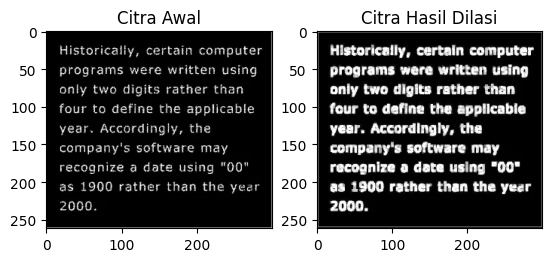

In [51]:
# Cross-shaped kernel
kernel_3x3 = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype = np.uint8)

# Square 3x3 kernel
# testing error
#kernel_3x3 = np.ones((3, 3), dtype=np.uint8)

# Pemanggilan function dilation
output = dilate(img_1, kernel_3x3)

print(kernel_3x3)
plt.subplot(121), plt.imshow(img_1), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output, cmap = 'gray'), plt.title('Citra Hasil Dilasi')
plt.show()

## 4. Dilasi dengan Strel (SED) dengan Library

[[0 1 0]
 [1 1 1]
 [0 1 0]]


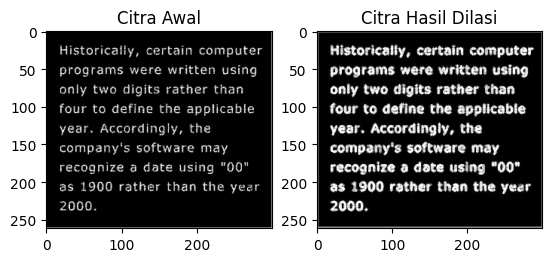

In [20]:
# Cross-shaped kernel (structuring element)
kernel_cross_3x3 = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

# Dilasi menggunakan function cv2.dilate()
output = cv.dilate(img_1, kernel_cross_3x3, iterations = 1)

print(kernel_cross_3x3)
plt.subplot(121), plt.imshow(img_1), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output), plt.title('Citra Hasil Dilasi')
plt.show()

## 5. Erosi dengan Strel (SE) tanpa Library

In [3]:
# Read Image
img_2 = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PVCK/Pertemuan 9/img/j.png')

if img_2 is None:
    print('Could not open or find the image.')
    exit(0)

### Function Erosi

In [52]:
def erode(image, kernel):
  # Convert image to grayscale
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  # Image size
  height = image.shape[0]
  width = image.shape[1]

  # value k & constant diubah, biar bisa dipake buat function opening
  kernel_size, _ = kernel.shape # _ gak dipake, karena kernel selalu persegi, k_size saja sudah cukup
  pad_size = kernel_size // 2 # tadinya (k_size - 1), balikin klo hasil beda.

  # Inisialisasi Image Erosi
  eroded = np.zeros_like(image)

  # Looping Erosi
  for i in range(pad_size, height - pad_size):
    for j in range(pad_size, width - pad_size):
        eroded_pixel_formula = image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
        eroded_pixel = eroded_pixel_formula * kernel
        eroded[i, j] = np.min(eroded_pixel)
  
  # Convert eroded to grayscale, delete if causing errors
  # eroded = cv.cvtColor(eroded, cv.COLOR_BGR2GRAY)
  return eroded

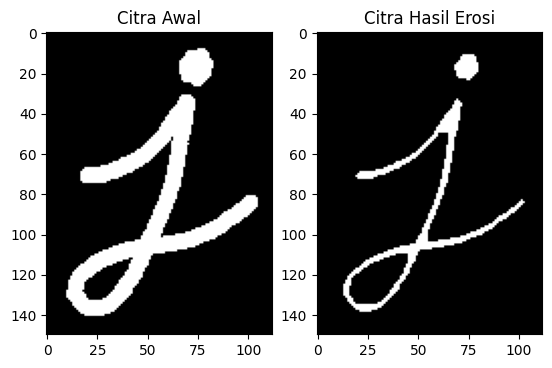

In [55]:
# Kernel square 5x5
kernel_5x5 = np.ones((5, 5), dtype = np.uint8)

# Pemanggilan function erosi
output = erode(img_2, kernel_5x5)

plt.subplot(121), plt.imshow(img_2), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(output, cmap = 'gray'), plt.title('Citra Hasil Erosi') # cmap =  'gray' untuk mengubah output grayscale sesuai plt
plt.show()

## 6. Erosi dengan Strel (SE) dengan Library

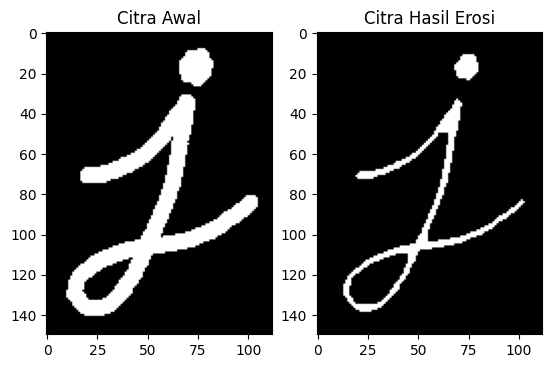

In [56]:
# Kernel square 5x5
kernel_5x5 = np.ones((5, 5), dtype = np.uint8)

# Erosi menggunakan function cv.erode()
output = cv.erode(img_2, kernel_5x5, iterations = 1)

plt.subplot(121), plt.imshow(img_2), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output), plt.title('Citra Hasil Erosi')
plt.show()

## 7. Opening dengan Strel berbentuk *square* 3x3

In [5]:
# Read Image
img_3 = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PVCK/Pertemuan 9/img/fingerprint.png')

if img_3 is None:
    print('Could not open or find the image.')
    exit(0)

#### Function Opening

Opening adalah nama lain dari **operasi erosi yang kemudian dilanjutkan dengan operasi dilasi**.


Fungsinya adalah untuk **menghapus noise** dari citra awal.

referensi:

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

In [36]:
def open_image(image, kernel):
  eroded = erode(image, kernel)

  dilated = dilate(eroded, kernel)
  output = dilated

  return eroded, output

#### Tanpa Library

(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

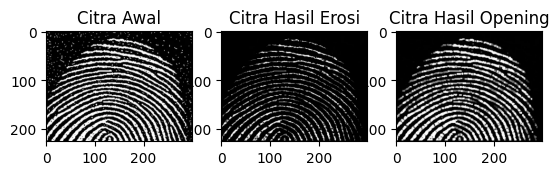

In [54]:
kernel_square_3x3 = np.ones((3, 3), dtype = np.uint8)

# Catatan, function error karena harusnya constantnya valuenya ga statis di function dilate & erode
# Figure out how to make it dynamic 
eroded, output = open_image(img_3, kernel_square_3x3)

plt.subplot(131), plt.imshow(img_3), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(eroded, cmap = 'gray'), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(output, cmap = 'gray'), plt.title('Citra Hasil Opening')

#### Dengan Library

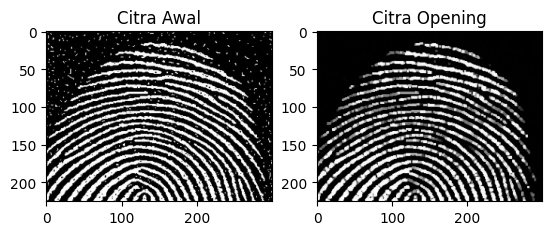

In [59]:
# Kernel Square 3x3
kernel_square_3x3 = np.ones((3, 3), dtype = np.uint8)

# Operasi Opening menggunakan library OpenCV
output = cv.morphologyEx(img_3, cv.MORPH_OPEN, kernel_square_3x3)

plt.subplot(121), plt.imshow(img_3), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output), plt.title('Citra Hasil Opening')
plt.show()

## 8. Operasi Closing dengan Strel Square 3 x 3

### Function Closing

Closing adalah nama lain dari **operasi dilasi yang kemudian dilanjutkan dengan operasi erosi**, kebalikan dari operasi opening.


Fungsinya adalah untuk **menutup lubang kecil atau titik hitam kecil pada objek** dari citra awal.


referensi:

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

In [62]:
def close_image(image, kernel):
  dilated = dilate(image, kernel)

  eroded = erode(dilated, kernel)
  output = eroded

  return dilated, output

### Tanpa Library

(<Axes: title={'center': 'Citra Hasil Closing'}>,
 Text(0.5, 1.0, 'Citra Hasil Closing'))

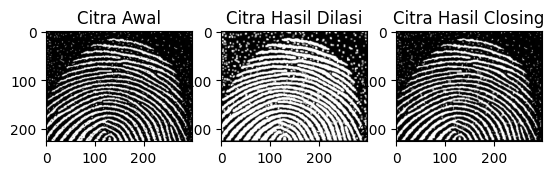

In [63]:
# Kernel Square 3x3
kernel_square_3x3 = np.ones((3, 3), dtype = np.uint8)

dilated, output = close_image(img_3, kernel_square_3x3)

plt.subplot(131), plt.imshow(img_3), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(dilated, cmap = 'gray'), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(output, cmap = 'gray'), plt.title('Citra Hasil Closing')

### Dengan Library

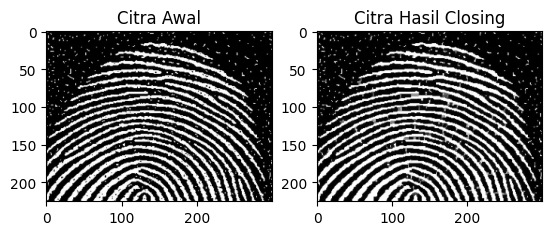

In [6]:
# Kernel Square 3x3
kernel_square_3x3 = np.ones((3, 3), dtype = np.uint8)

# Operasi Opening menggunakan library OpenCV
output = cv.morphologyEx(img_3, cv.MORPH_CLOSE, kernel_square_3x3)

plt.subplot(121), plt.imshow(img_3), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output), plt.title('Citra Hasil Closing')
plt.show()

## 9. Operasi Dilasi dengan Strel Cross 3 x 3 dan 5 x 5

### Strel Cross 3 x 3

SED = Cross 3


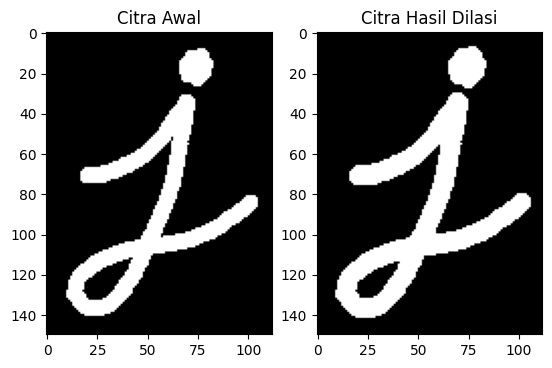

In [7]:
# Strel Cross 3 x 3
kernel_cross_3x3 = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

output = cv.dilate(img_2, kernel_cross_3x3, iterations = 1)

print('SED = Cross 3')
plt.subplot(121), plt.imshow(img_2), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output), plt.title('Citra Hasil Dilasi')
plt.show()

### Strel Cross 5 x 5

SED = Cross 5


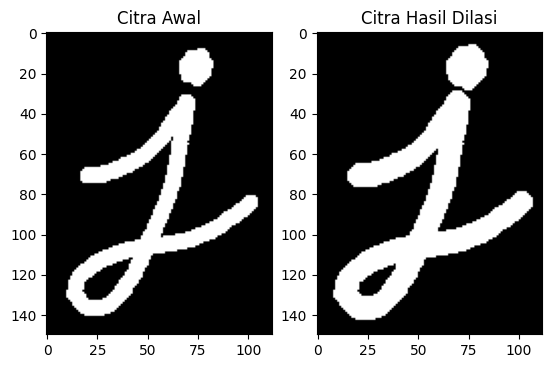

In [8]:
# Strel Cross 5 x 5
kernel_cross_5x5 = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))

output = cv.dilate(img_2, kernel_cross_5x5, iterations = 1)

print('SED = Cross 5')
plt.subplot(121), plt.imshow(img_2), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output), plt.title('Citra Hasil Dilasi')
plt.show()

## 10. Operasi Dilasi dengan Strel Circular 3 x 3 dan 5 x 5

### Strel Circular 3 x 3

SED = Circle 3


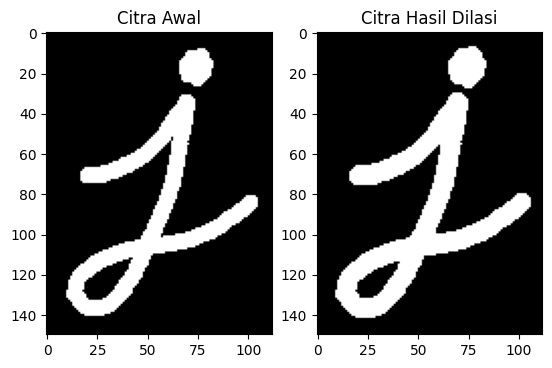

In [9]:
# Strel Circular 3 x 3
kernel_circ_3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))

output = cv.dilate(img_2, kernel_circ_3x3, iterations = 1)

print('SED = Circle 3')
plt.subplot(121), plt.imshow(img_2), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output), plt.title('Citra Hasil Dilasi')
plt.show()

### Strel Circular 5 x 5

SED = Circle 5


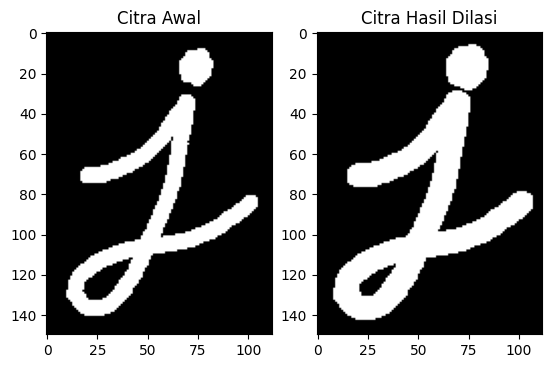

In [10]:
# Strel Circular 5 x 5 
kernel_circ_5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

output = cv.dilate(img_2, kernel_circ_5x5, iterations = 1)

print('SED = Circle 5')
plt.subplot(121), plt.imshow(img_2), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output), plt.title('Citra Hasil Dilasi')
plt.show()

## 11. Operasi Erosi dengan Strel Rectangle 3 x 5 dan 5 x 7

### Strel Rectangle 3 x 5

SE = Rectangle 3x5


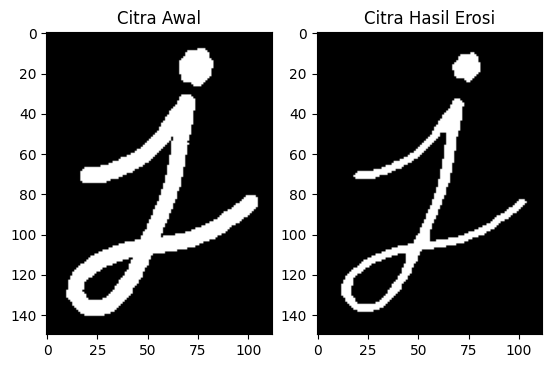

In [11]:
# Kernel Rectangle 3 x 5
kernel_rect_3x5 = cv.getStructuringElement(cv.MORPH_RECT, (3, 5))

output = cv.erode(img_2, kernel_rect_3x5, iterations = 1)

print('SE = Rectangle 3x5')
plt.subplot(121), plt.imshow(img_2), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output), plt.title('Citra Hasil Erosi')
plt.show()

### Strel Rectangle 5 x 7

SE = Rectangle 5x7


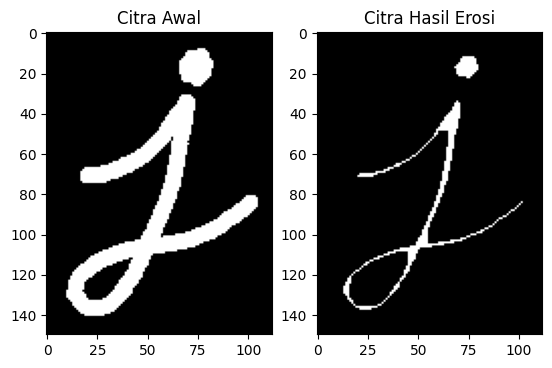

In [12]:
# Kernel Rectangle 5 x 7
kernel_rect_5x7 = cv.getStructuringElement(cv.MORPH_RECT, (5, 7))

output = cv.erode(img_2, kernel_rect_5x7, iterations = 1)

print('SE = Rectangle 5x7')
plt.subplot(121), plt.imshow(img_2), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output), plt.title('Citra Hasil Erosi')
plt.show()

## 12. Operasi Erosi dengan Strel Line Vertikal 3 dan 5

### Strel Line Vertikal 3

SE = Line Vertikal 3


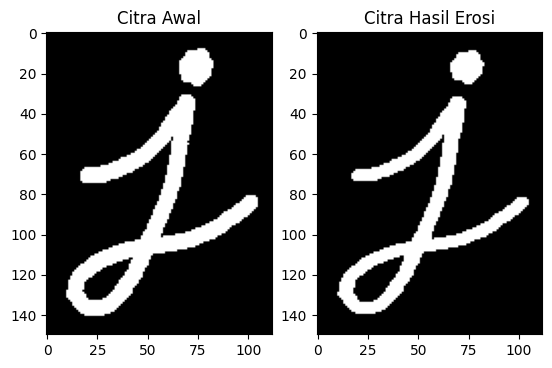

In [13]:
# Strel Line Vertikal 3
kernel_vert_line_3 = np.ones((3, 1), np.uint8)

output = cv.erode(img_2, kernel_vert_line_3, iterations = 1)

print('SE = Line Vertikal 3')
plt.subplot(121), plt.imshow(img_2), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output), plt.title('Citra Hasil Erosi')
plt.show()

### Strel Line Vertikal 5

SE = Line Vertikal 5


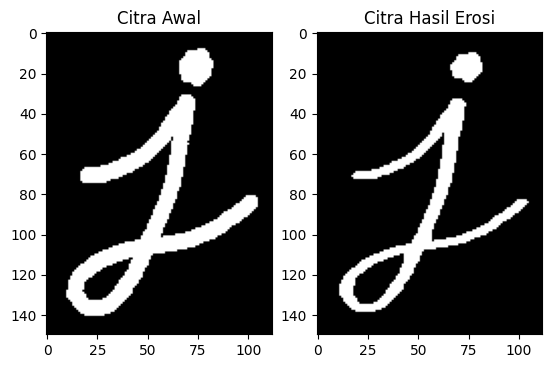

In [14]:
# Strel Line Vertikal 5
kernel_vert_line_5 = np.ones((5, 1), np.uint8)

output = cv.erode(img_2, kernel_vert_line_5, iterations = 1)

print('SE = Line Vertikal 5')
plt.subplot(121), plt.imshow(img_2), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(output), plt.title('Citra Hasil Erosi')
plt.show()

Link Colab:

https://github.com/FaiqPrasetya/pvck-tugas/blob/main/Week9.ipynb